**Importing all the important libraries**

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.ensemble import  RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from mediapipe_handler import MediaPipeHandler
import seaborn as sns
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
import pickle

current_dir = os.getcwd()

**Workflow**
1. Loading Training and Testing Datasets
2. Add Label string values
3. Looking at workout distributions
4. Preprocessing
5. Feature Engineering
6. Train Random Forest with hyperparameters [with and without feature engineering]
7. Train Neural Network with hyperparameters [with and without feature engineering]
8. Train SVM with hyperparameters [with and without feature engineering]
9. Compare model performance in terms of SPEED,ACCURACY,PERCISION,RECALL,F1-SCORE
10. Do the same process but with SMOTE to handle imbalance classes, then compare accuracy

**1. Loading Training and Testing Datasets**

In [2]:
mediapipe_model = MediaPipeHandler()

training_dataset=mediapipe_model.read_csv_to_pd(current_dir + "/../data/train.csv")[:40000]
testing_dataset=mediapipe_model.read_csv_to_pd(current_dir + "/../data/test.csv")

I0000 00:00:1750810108.974285 8961366 gl_context.cc:369] GL version: 2.1 (2.1 Metal - 89.4), renderer: Apple M4 Pro
INFO: Created TensorFlow Lite XNNPACK delegate for CPU.
W0000 00:00:1750810109.029170 8961877 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1750810109.038102 8961877 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.


In [3]:
training_dataset

,Unnamed: 0,image,label,muscle group,left_shoulder,right_shoulder,left_elbow,right_elbow,left_wrist,right_wrist,left_hip,right_hip,left_knee,right_knee,left_ankle,right_ankle
0,0,<PIL.JpegImagePlugin.JpegImageFile image mode=...,16,4,"[0.4922604, 0.42163706, -0.24030042]","[0.53156673, 0.37822577, 0.07668118]","[0.44369946, 0.59956827, -0.19300471]","[0.45397556, 0.4781855, 0.16201527]","[0.37048573, 0.57486971, -0.13763787]","[0.42427227, 0.50313056, 0.21470366]","[0.44376543, 0.62636036, -0.08390325]","[0.42099413, 0.56720209, 0.08342866]","[0.42597234, 0.68477267, -0.39593986]","[0.31419969, 0.38540038, -0.15719426]","[0.35246284, 0.59799594, -0.14833233]","[0.20735033, 0.52032554, -0.41196194]"
1,1,<PIL.JpegImagePlugin.JpegImageFile image mode=...,7,2,"[0.62749015, 0.59225705, 0.31552757]","[0.44164624, 0.69347347, -0.0980502]","[0.73220797, 0.44755279, 0.13616676]","[0.3659623, 0.52181472, -0.47456339]","[0.72380447, 0.18449886, -0.04002919]","[0.32491907, 0.20652397, -0.54093099]","[0.7319079, 0.95736569, 0.06169812]","[0.60921025, 1.02435124, -0.06084104]","[0.84753918, 1.27018143, 0.03953565]","[0.69445598, 1.37398243, -0.17376803]","[0.942954, 1.6112144, 0.21499798]","[0.8221851, 1.71487486, -0.047912]"
2,2,<PIL.JpegImagePlugin.JpegImageFile image mode=...,7,2,"[0.5516026, 0.65443498, 0.17635234]","[0.36770818, 0.60361952, 0.17112157]","[0.65237023, 0.73569669, 0.04915023]","[0.31145719, 0.65077877, -0.1103681]","[0.57790828, 0.51538818, -0.06404708]","[0.34510586, 0.52655672, -0.29702761]","[0.48281592, 0.94173944, 0.00363601]","[0.36202687, 0.89418411, -0.00342374]","[0.45584293, 1.08562136, 0.3071512]","[0.32000503, 1.05442452, 0.25084856]","[0.45821334, 1.32961053, 0.6917255]","[0.26038734, 1.30754372, 0.6202194]"
3,3,<PIL.JpegImagePlugin.JpegImageFile image mode=...,11,4,"[0.56611103, 0.22942588, -0.1417421]","[0.47920221, 0.24367008, 0.15922321]","[0.58982182, 0.3581312, -0.30938008]","[0.45838884, 0.369793, 0.17935918]","[0.54251671, 0.33633837, -0.59469163]","[0.39934072, 0.35467258, -0.10816862]","[0.53094459, 0.50230831, -0.09462774]","[0.48071885, 0.50269449, 0.09463124]","[0.50269347, 0.70908743, -0.08133581]","[0.46534663, 0.68884176, 0.08822098]","[0.48764995, 0.89896733, 0.08302714]","[0.46219632, 0.8944689, 0.25673959]"
4,4,<PIL.JpegImagePlugin.JpegImageFile image mode=...,5,3,"[0.59351949, 0.38964689, -0.40948197]","[0.40387544, 0.38806155, -0.39467755]","[0.58893466, 0.60909295, -0.24166781]","[0.43007138, 0.58506065, -0.26906126]","[0.60242116, 0.81074196, -0.36176482]","[0.36626551, 0.80064547, -0.43352228]","[0.57567582, 0.70254374, -0.03491814]","[0.47756628, 0.71589197, -0.02651594]","[0.56671677, 1.02243322, 0.06491827]","[0.47379143, 0.97389757, 0.05754138]","[0.53177809, 1.18574346, 0.57939289]","[0.44639385, 1.18645585, 0.57720226]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,39995,<PIL.JpegImagePlugin.JpegImageFile image mode=...,10,6,"[0.68923074, 0.24964227, -0.24771664]","[0.57661313, 0.21131295, 0.10800846]","[0.71901059, 0.44414979, -0.28905961]","[0.57020772, 0.37704083, 0.17945057]","[0.56266264, 0.44510833, -0.13630149]","[0.54864985, 0.50098336, 0.06025526]","[0.63387418, 0.5202269, -0.10667536]","[0.56235248, 0.48001659, 0.10692207]","[0.51551056, 0.58397233, -0.50651157]","[0.43487906, 0.55435669, -0.22606185]","[0.39528993, 0.76413727, -0.72948474]","[0.3334952, 0.7161696, -0.49474984]"
39996,39996,<PIL.JpegImagePlugin.JpegImageFile image mode=...,2,2,"[0.62139893, 0.51579726, 0.00776917]","[0.43936889, 0.50039671, -0.47612957]","[0.71967312, 0.60042761, 0.51824548]","[0.23700871, 0.66502142, -0.81957674]","[0.81691206, 0.58385056, 0.83195114]","[0.07229628, 0.66355693, -1.20229853]","[0.59429897, 1.07195208, 0.15748864]","[0.51996973, 1.08848556, -0.17358421]","[0.55228668, 1.29136642, 0.49695712]","[0.49732387, 1.3939166, 0.14205198]","[0.5925769, 1.61916741, 1.0986084]","[0.41801852, 1.68510354, 0.6390143]"
39997,39997,<PIL.JpegImagePlugin.JpegIm

In [4]:
training_dataset['left_ankle']

0        [0.35246284, 0.59799594, -0.14833233]
1            [0.942954, 1.6112144, 0.21499798]
2          [0.45821334, 1.32961053, 0.6917255]
3         [0.48764995, 0.89896733, 0.08302714]
4         [0.53177809, 1.18574346, 0.57939289]
                         ...                  
39995    [0.39528993, 0.76413727, -0.72948474]
39996       [0.5925769, 1.61916741, 1.0986084]
39997     [0.18005756, 0.58698809, 0.35373867]
39998      [0.45632754, 0.7783551, 0.09523933]
39999     [0.79882674, 1.00606141, 0.20298033]
Name: left_ankle, Length: 40000, dtype: object

**3. Looking at Workout Distribution**

In [5]:
Workout_labels=training_dataset['muscle group'].unique()

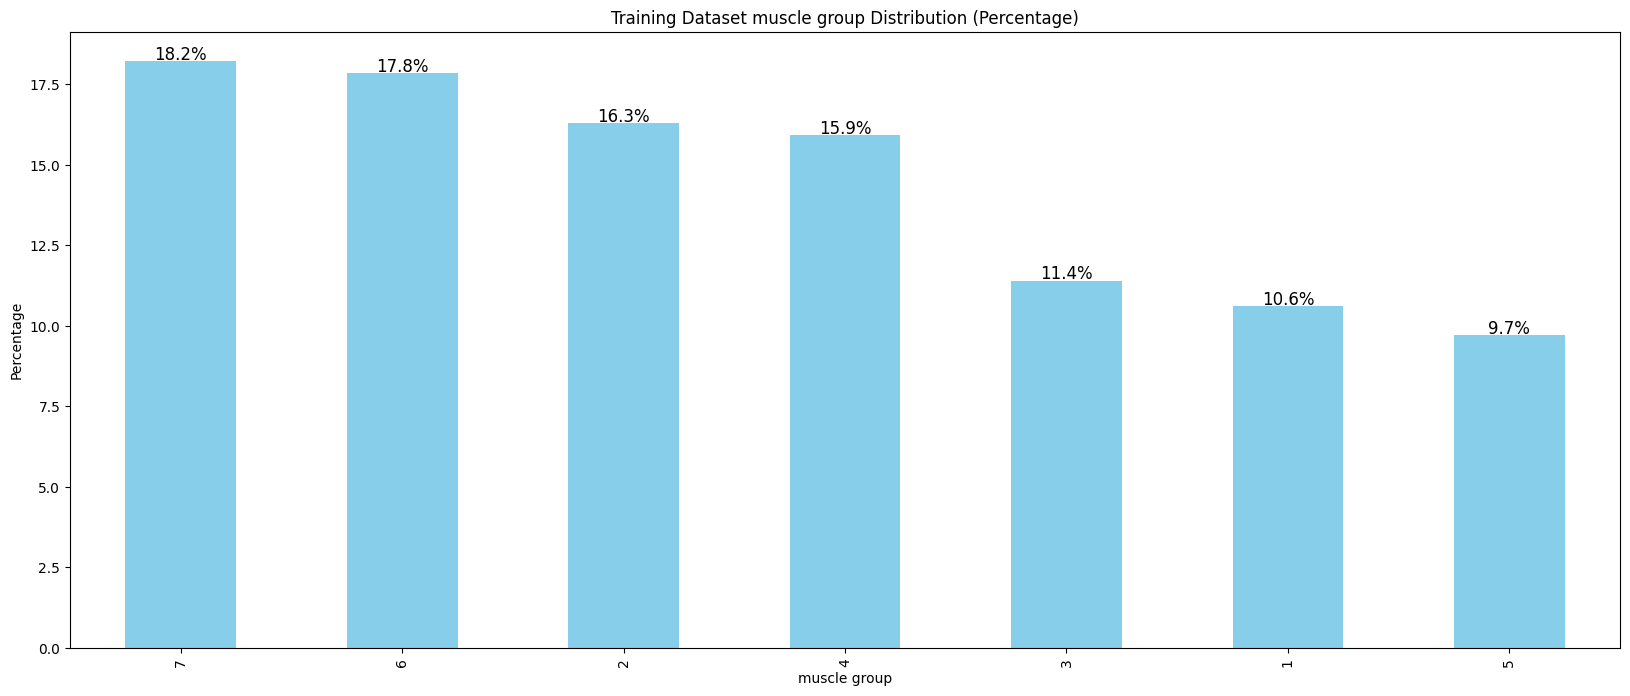

In [6]:
def display_class_distribution(classes):    
    plt.figure(figsize=(20,8))
    value_counts = classes.value_counts()
    percentages = value_counts / value_counts.sum() * 100

    # Plot
    ax = percentages.plot(kind='bar', color='skyblue')

    # Add percentage text on each bar
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')

    plt.title('Training Dataset muscle group Distribution (Percentage)')
    plt.ylabel('Percentage')
    plt.show()
display_class_distribution(training_dataset['muscle group'])

**4. Preprocessing**

**We have to make sure that we get right of Unamed 0: column, as it just contains numerical index not very useful, might lead to overfitting if it is left**
- Get rid of Unnamed 0:
- Get rid of image
- Get rid of muscle group
- split each feature into x,y,z components, then remove that original feature


In [7]:
"""
Removes original feature and splits it into x,y,z components

"""
def Preprocess_data(dataframe,columns_to_flatten):
    final_df=dataframe.copy()
    # Expanding each column into 3 separate columns (x, y, z) and appending it to the final dataframe.
    for column in columns_to_flatten:
        # print(np.vstack(dataframe[column]).astype(float))
        expanded_df=pd.DataFrame(np.vstack(dataframe[column]).astype(float), 
                           columns=[column+'_x', column+'_y', column+'_z'],
                           index=dataframe.index)
        new_df = pd.concat([dataframe.drop(column, axis=1), expanded_df], axis=1)
        for new_column in new_df.columns:
            final_df[new_column] = new_df[new_column]

    return final_df.drop(columns=columns_to_flatten,axis=1)

"""
Splits dataset into X_train,y_train or X_test,y_test, if you give it training dataset then X_train and y_train

"""
def Return_X_y(dataframe,columns_to_delete):
    X=dataframe.drop(columns=columns_to_delete)
    y=dataframe['muscle group']
    return X,y

In [8]:
features_to_split=['left_shoulder',
       'right_shoulder', 'left_elbow', 'right_elbow', 'left_wrist',
       'right_wrist', 'left_hip', 'right_hip', 'left_knee',
       'right_knee', 'left_ankle', 'right_ankle']

training_dataset_preprocessed=Preprocess_data(training_dataset,features_to_split)
X_train, y_train = Return_X_y(training_dataset_preprocessed,['label','muscle group','image','Unnamed: 0'])


testing_dataset_preprocessed=Preprocess_data(testing_dataset,features_to_split)
X_test, y_test = Return_X_y(testing_dataset_preprocessed,['label','muscle group','image','Unnamed: 0'])

In [9]:
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)
X_test, y_test = smote.fit_resample(X_test, y_test)

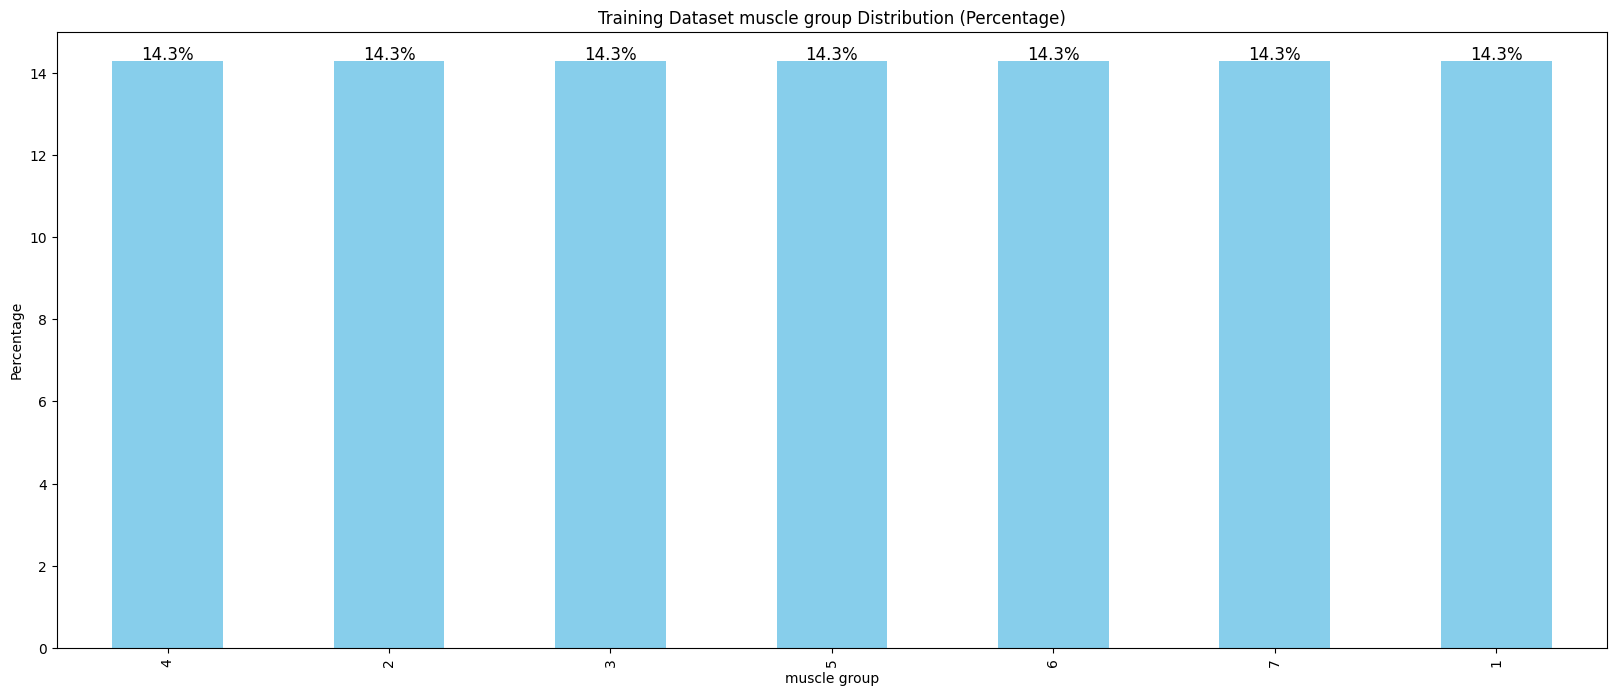

In [10]:
display_class_distribution(y_train)

In [11]:
print("X_train Shape",X_train.shape)

print("y_train Shape",y_train.shape)

print("X_test Shape",X_test.shape)

print("y_test Shape",y_test.shape)

X_train Shape (51016, 36)
y_train Shape (51016,)
X_test Shape (14112, 36)
y_test Shape (14112,)


**66 Features is all the features**

**5. Feature Engineering**

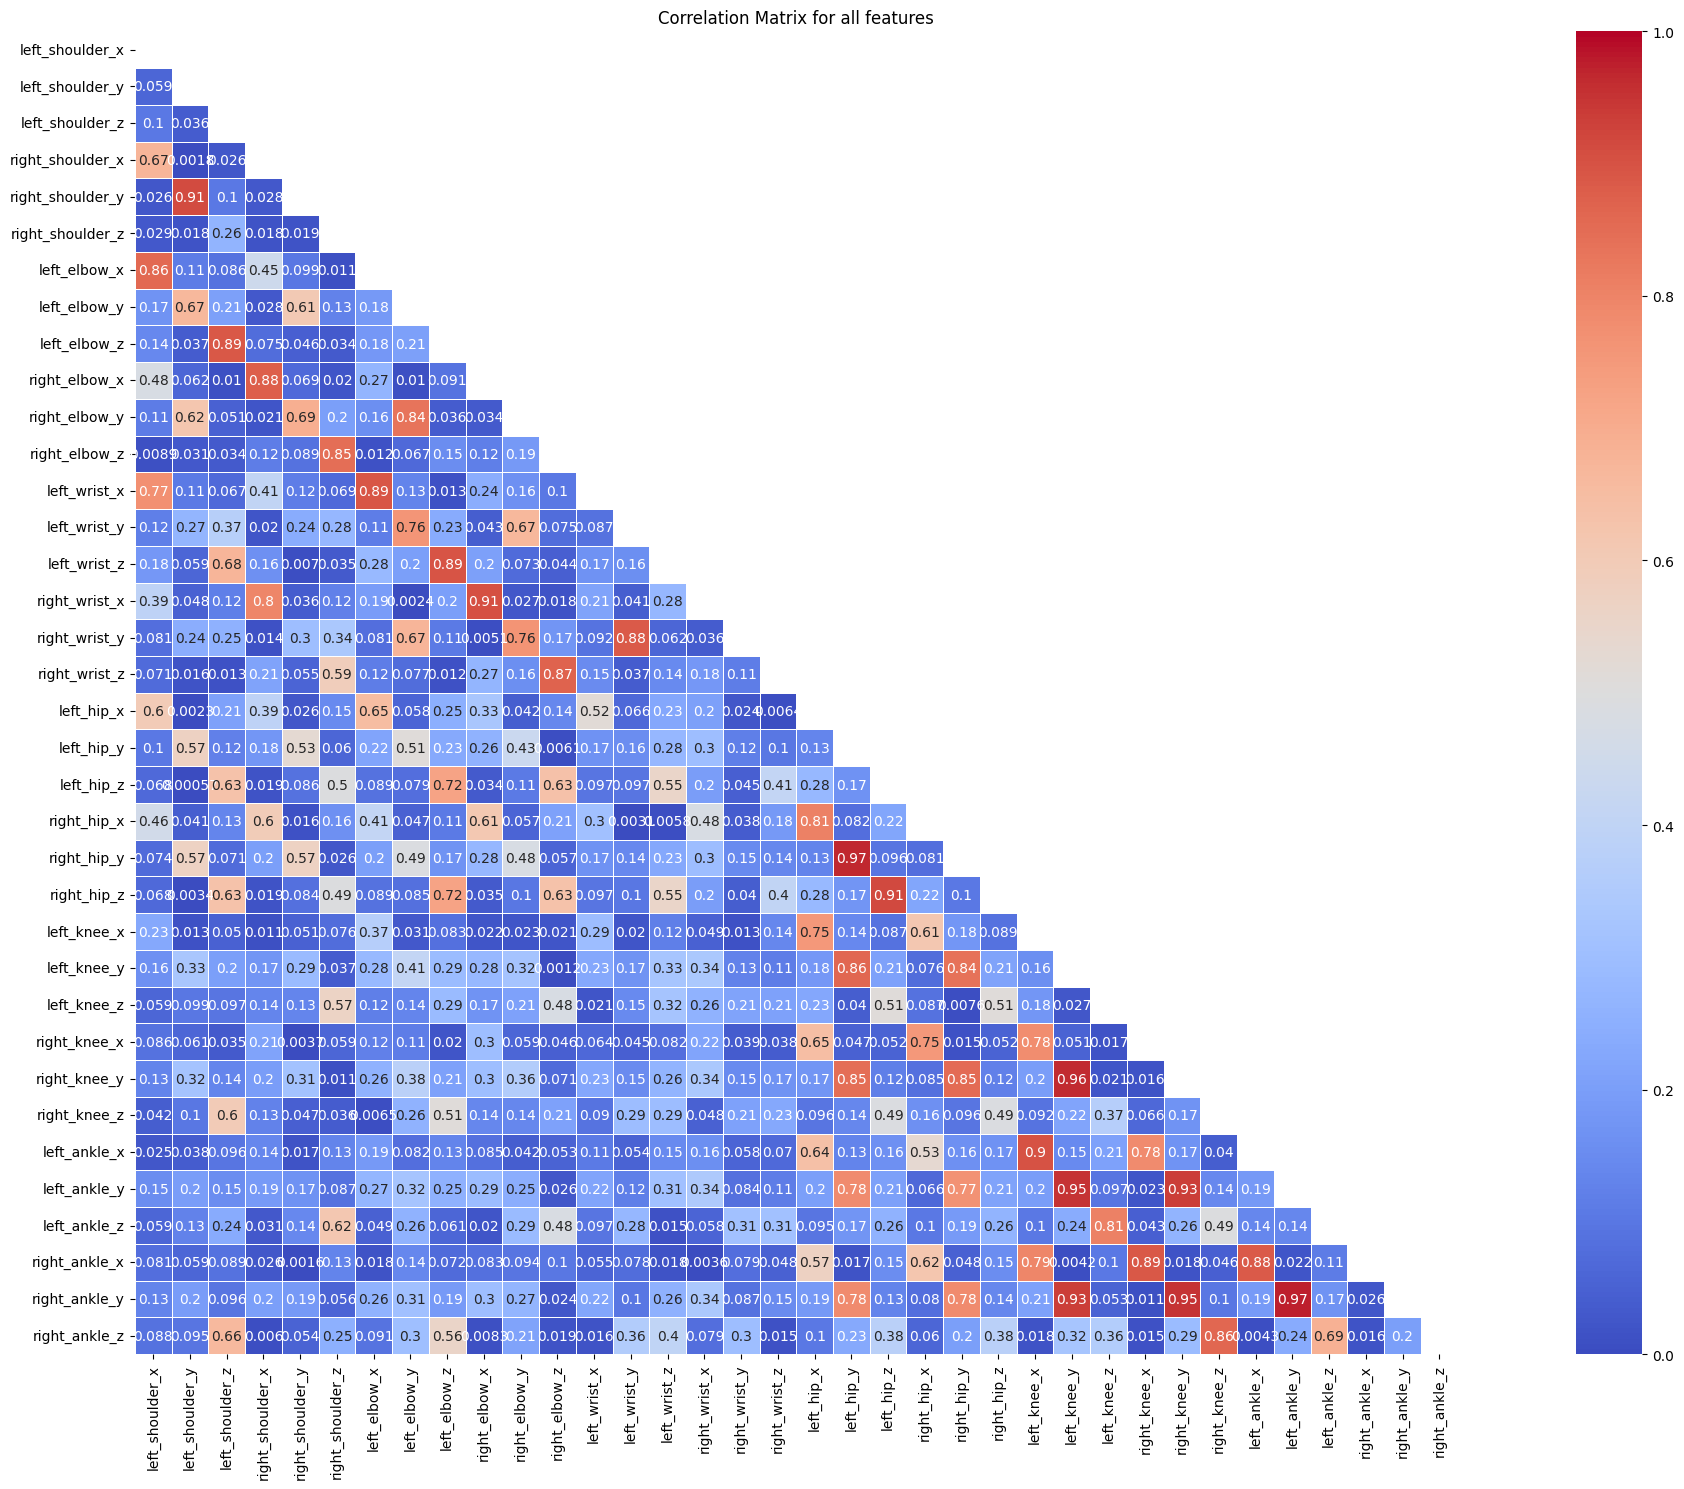

In [12]:
corr_matrix = X_train.corr().abs()

mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

plt.figure(figsize=(24, 15))
sns.heatmap(corr_matrix, mask=mask, cmap='coolwarm', 
            vmax=1.0, vmin=0, center=0.5,
            square=True, linewidths=.5, annot=True).set(title='Correlation Matrix for all features')
plt.tight_layout()
plt.show()

**Features that are highly correlated , one of them should be removed**
- it is better to remove the one that is the least correlated with y_target

In [13]:
correlation_threshold = 0.8
columns_to_drop = []

for i in range(len(corr_matrix.columns)):
    for j in range(i+1, len(corr_matrix.columns)):
        if corr_matrix.iloc[i, j] > correlation_threshold:
            columns_to_drop.append(corr_matrix.columns[j])
            print(f"High Correlation between {corr_matrix.columns[i]} and {corr_matrix.columns[j]} --> {corr_matrix.iloc[i, j]:.2f}")

columns_to_drop = list(set(columns_to_drop))
print(f"Columns to drop: {columns_to_drop}")
print(f"number of columns to drop: {len(columns_to_drop)}")

High Correlation between left_shoulder_x and left_elbow_x --> 0.86
High Correlation between left_shoulder_y and right_shoulder_y --> 0.91
High Correlation between left_shoulder_z and left_elbow_z --> 0.89
High Correlation between right_shoulder_x and right_elbow_x --> 0.88
High Correlation between right_shoulder_z and right_elbow_z --> 0.85
High Correlation between left_elbow_x and left_wrist_x --> 0.89
High Correlation between left_elbow_y and right_elbow_y --> 0.84
High Correlation between left_elbow_z and left_wrist_z --> 0.89
High Correlation between right_elbow_x and right_wrist_x --> 0.91
High Correlation between right_elbow_z and right_wrist_z --> 0.87
High Correlation between left_wrist_y and right_wrist_y --> 0.88
High Correlation between left_hip_x and right_hip_x --> 0.81
High Correlation between left_hip_y and right_hip_y --> 0.97
High Correlation between left_hip_y and left_knee_y --> 0.86
High Correlation between left_hip_y and right_knee_y --> 0.85
High Correlation betwe

In [14]:
print(f"Columns to drop: {columns_to_drop}")


Columns to drop: ['right_elbow_x', 'right_wrist_z', 'right_wrist_y', 'left_wrist_x', 'right_hip_z', 'right_elbow_z', 'right_ankle_y', 'left_ankle_z', 'left_ankle_x', 'right_wrist_x', 'right_elbow_y', 'right_ankle_z', 'right_hip_y', 'right_ankle_x', 'left_wrist_z', 'right_knee_y', 'left_elbow_x', 'right_hip_x', 'left_elbow_z', 'right_shoulder_y', 'left_knee_y', 'left_ankle_y']


**53 Columns to drop**

In [15]:
X_train_feature_eng=X_train.drop(columns=columns_to_drop)
X_test_feature_eng=X_test.drop(columns=columns_to_drop)

In [16]:
X_train_feature_eng

,left_shoulder_x,left_shoulder_y,left_shoulder_z,right_shoulder_x,right_shoulder_z,left_elbow_y,left_wrist_y,left_hip_x,left_hip_y,left_hip_z,left_knee_x,left_knee_z,right_knee_x,right_knee_z
0,0.492260,0.421637,-0.240300,0.531567,0.076681,0.599568,0.574870,0.443765,0.626360,-0.083903,0.425972,-0.395940,0.314200,-0.157194
1,0.627490,0.592257,0.315528,0.441646,-0.098050,0.447553,0.184499,0.731908,0.957366,0.061698,0.847539,0.039536,0.694456,-0.173768
2,0.551603,0.654435,0.176352,0.367708,0.171122,0.735697,0.515388,0.482816,0.941739,0.003636,0.455843,0.307151,0.320005,0.250849
3,0.566111,0.229426,-0.141742,0.479202,0.159223,0.358131,0.336338,0.530945,0.502308,-0.094628,0.502693,-0.081336,0.465347,0.088221
4,0.593519,0.389647,-0.409482,0.403875,-0.394678,0.609093,0.810742,0.575676,0.702544,-0.034918,0.566717,0.064918,0.473791,0.057541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51011,0.720777,0.243714,-0.265642,0.608311,0.080906,0.441869,0.596815,0.675118,0.524971,-0.100668,0.550171,-0.515886,0.479669,-0.244850
51012,0.294994,0.092088,0.003522,0.171549,-0.031802,0.117807,0.118928,0.272724,0.433898,-0.002209,0.372910,-0.380103,0.152882,-0.429111
51013,0.555363,0.386798,-0.030351,0.434430,-0.021214,0.462801,0.371196,0.521143,0.636509,-0.001737,0.536799,-0.091889,0.426268,-0.095598
51014,0.675048,0.351899,-0.253016,0.612107,0.058516,0.473276,0.603199,0.634580,0.554875,-0.101116,0.521752,-0.416946,0.493857,-0.130575


In [17]:
X_train.columns

Index(['left_shoulder_x', 'left_shoulder_y', 'left_shoulder_z',
       'right_shoulder_x', 'right_shoulder_y', 'right_shoulder_z',
       'left_elbow_x', 'left_elbow_y', 'left_elbow_z', 'right_elbow_x',
       'right_elbow_y', 'right_elbow_z', 'left_wrist_x', 'left_wrist_y',
       'left_wrist_z', 'right_wrist_x', 'right_wrist_y', 'right_wrist_z',
       'left_hip_x', 'left_hip_y', 'left_hip_z', 'right_hip_x', 'right_hip_y',
       'right_hip_z', 'left_knee_x', 'left_knee_y', 'left_knee_z',
       'right_knee_x', 'right_knee_y', 'right_knee_z', 'left_ankle_x',
       'left_ankle_y', 'left_ankle_z', 'right_ankle_x', 'right_ankle_y',
       'right_ankle_z'],
      dtype='object')

In [18]:
X_train_feature_eng.columns
# y_train.columns

Index(['left_shoulder_x', 'left_shoulder_y', 'left_shoulder_z',
       'right_shoulder_x', 'right_shoulder_z', 'left_elbow_y', 'left_wrist_y',
       'left_hip_x', 'left_hip_y', 'left_hip_z', 'left_knee_x', 'left_knee_z',
       'right_knee_x', 'right_knee_z'],
      dtype='object')

In [19]:
"""
This function takes both training_dataset
then it will show the result for each one of the models

1-Accuracy
2-Classification Report
3-Confusion Matrix
4-Precision, Recall, F1-Score
5-Time Taken to train
6-Features used to build the model

"""

def train_model(model,param_grid,X_train,y_train,X_test,y_test):
    grid_search = GridSearchCV(
        estimator=model,
        param_grid=param_grid,
        cv=3,  # 5-fold cross-validation
        n_jobs=-1,  # Use all available cores
        verbose=2,
        scoring='accuracy'
    )
    grid_search.fit(X_train,y_train)
    y_predictions=grid_search.predict(X_test)
    accuracy = accuracy_score(y_test,y_predictions)
    report = classification_report(y_test,y_predictions)
    confusion_matrix_values = confusion_matrix(y_test,y_predictions)
    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion_matrix_values, annot=True, fmt='d', cmap='Blues', cbar=True, 
                xticklabels=Workout_labels,
                yticklabels=Workout_labels)

    # Add labels, title, and axis ticks
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix Heatmap')

    # Show the plot
    plt.show()
    print("Best Parameters:", grid_search.best_params_)
    print("Accuracy:", (accuracy*100),"%")
    print("Classification Report:\n", report)
    return grid_search.best_estimator_

**Random Forest**

In [20]:
param_grid = {
    'n_estimators': [50],
    'max_depth': [20],
    # 'min_samples_split': [2, 5, 10],
    # 'min_samples_leaf': [1, 2, 4],
    # 'max_features': ['sqrt', 'log2', None]
}



**Random Forest with no feature engineering**

Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END ......................max_depth=20, n_estimators=50; total time=   6.6s
[CV] END ......................max_depth=20, n_estimators=50; total time=   6.8s
[CV] END ......................max_depth=20, n_estimators=50; total time=   6.8s


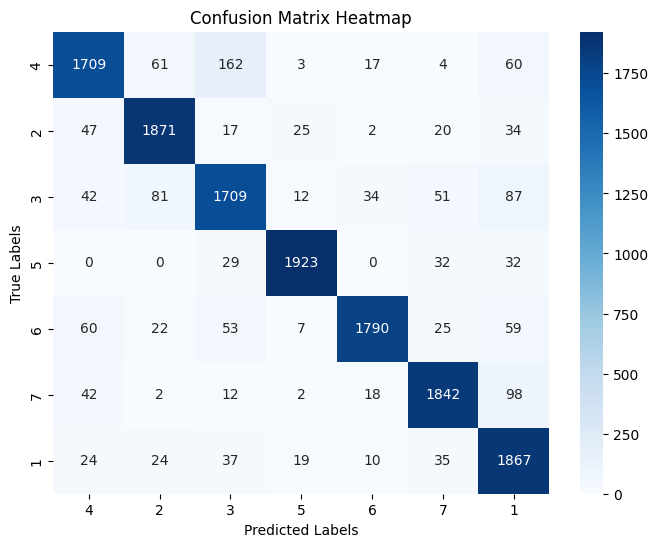

Best Parameters: {'max_depth': 20, 'n_estimators': 50}
Accuracy: 90.07227891156462 %
Classification Report:
               precision    recall  f1-score   support

           1       0.89      0.85      0.87      2016
           2       0.91      0.93      0.92      2016
           3       0.85      0.85      0.85      2016
           4       0.97      0.95      0.96      2016
           5       0.96      0.89      0.92      2016
           6       0.92      0.91      0.92      2016
           7       0.83      0.93      0.88      2016

    accuracy                           0.90     14112
   macro avg       0.90      0.90      0.90     14112
weighted avg       0.90      0.90      0.90     14112



In [21]:
random_tree_model = RandomForestClassifier(random_state=42)
rfc_model = train_model(random_tree_model,param_grid,X_train,y_train,X_test,y_test)

In [ ]:
with open(current_dir + "/../models/muscle_group_classifiers/rfc_muscle_group_classifier.pkl", 'wb') as f:
    print(type(rfc_model))
    pickle.dump(rfc_model, f)

<class 'sklearn.ensemble._forest.RandomForestClassifier'>


In [ ]:
with open(current_dir + "/../models/muscle_group_classifiers/rfc_muscle_group_classifier.pkl", 'rb') as f:
    rfc_model = pickle.load(f)

**Random Forest with feature engineering**

Fitting 3 folds for each of 1 candidates, totalling 3 fits
[CV] END ......................max_depth=20, n_estimators=50; total time=   3.4s
[CV] END ......................max_depth=20, n_estimators=50; total time=   3.4s
[CV] END ......................max_depth=20, n_estimators=50; total time=   3.5s


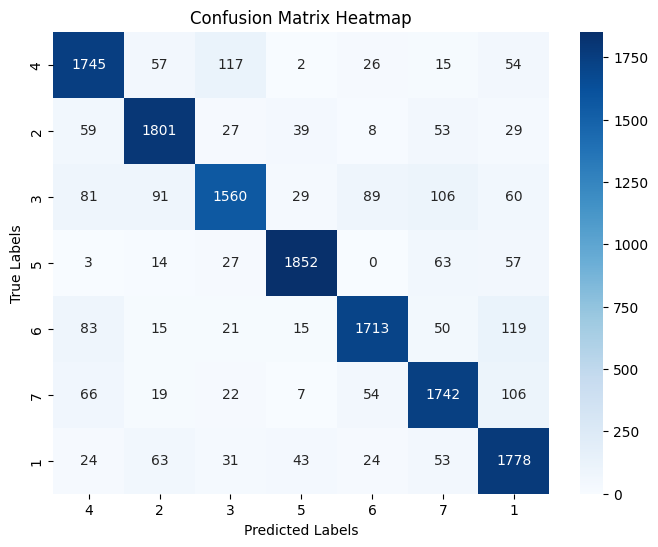

Best Parameters: {'max_depth': 20, 'n_estimators': 50}
Accuracy: 86.3874716553288 %
Classification Report:
               precision    recall  f1-score   support

           1       0.85      0.87      0.86      2016
           2       0.87      0.89      0.88      2016
           3       0.86      0.77      0.82      2016
           4       0.93      0.92      0.93      2016
           5       0.89      0.85      0.87      2016
           6       0.84      0.86      0.85      2016
           7       0.81      0.88      0.84      2016

    accuracy                           0.86     14112
   macro avg       0.87      0.86      0.86     14112
weighted avg       0.87      0.86      0.86     14112



In [24]:
rfc_feat_eng_model = train_model(random_tree_model,param_grid,X_train_feature_eng,y_train,X_test_feature_eng,y_test)

In [ ]:
with open(current_dir + "/../models/muscle_group_classifiers/rfc_feat_eng_muscle_group_classifier.pkl", 'wb') as f:
    print(type(rfc_feat_eng_model))
    pickle.dump(rfc_feat_eng_model, f)

<class 'sklearn.ensemble._forest.RandomForestClassifier'>


In [ ]:
with open(current_dir + "/../models/muscle_group_classifiers/rfc_feat_eng_muscle_group_classifier.pkl", 'rb') as f:
    rfc_feat_eng_model = pickle.load(f)

**Multilayer Perceptron**

In [27]:
param_grid = {
    'hidden_layer_sizes': [(50,), (100,)],  
    # 'activation': ['relu', 'tanh'],  
    # 'solver': ['adam', 'sgd'],  
    # 'alpha': [0.0001, 0.001, 0.01],  
    # 'learning_rate': ['constant', 'adaptive'],  
    # 'max_iter': [200, 500, 1000]  
}

**Multilayer Perceptron with no feature engineering**

Fitting 3 folds for each of 2 candidates, totalling 6 fits


/opt/anaconda3/envs/mediapipe/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/envs/mediapipe/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END ...........................hidden_layer_sizes=(50,); total time=   6.6s
[CV] END ...........................hidden_layer_sizes=(50,); total time=   6.6s


/opt/anaconda3/envs/mediapipe/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END ...........................hidden_layer_sizes=(50,); total time=   6.5s


/opt/anaconda3/envs/mediapipe/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END ..........................hidden_layer_sizes=(100,); total time=  10.0s


/opt/anaconda3/envs/mediapipe/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/envs/mediapipe/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END ..........................hidden_layer_sizes=(100,); total time=   9.6s
[CV] END ..........................hidden_layer_sizes=(100,); total time=   9.6s


/opt/anaconda3/envs/mediapipe/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


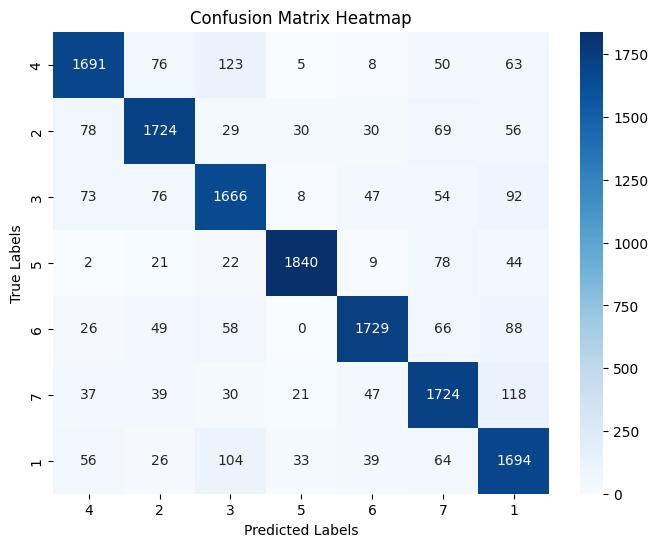

Best Parameters: {'hidden_layer_sizes': (100,)}
Accuracy: 85.51587301587301 %
Classification Report:
               precision    recall  f1-score   support

           1       0.86      0.84      0.85      2016
           2       0.86      0.86      0.86      2016
           3       0.82      0.83      0.82      2016
           4       0.95      0.91      0.93      2016
           5       0.91      0.86      0.88      2016
           6       0.82      0.86      0.84      2016
           7       0.79      0.84      0.81      2016

    accuracy                           0.86     14112
   macro avg       0.86      0.86      0.86     14112
weighted avg       0.86      0.86      0.86     14112



In [28]:
mlp_model = MLPClassifier(random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

mlp_model = train_model(mlp_model,param_grid,X_train_scaled,y_train,X_test_scaled,y_test)

In [ ]:
with open(current_dir + "/../models/muscle_group_classifiers/mlp_muscle_group_classifier.pkl", 'wb') as f:
    print(type(mlp_model))
    pickle.dump(mlp_model, f)

<class 'sklearn.neural_network._multilayer_perceptron.MLPClassifier'>


In [ ]:
with open(current_dir + "/../models/muscle_group_classifiers/mlp_muscle_group_classifier.pkl", 'rb') as f:
    mlp_model = pickle.load(f)

**Multilayer Perceptron with feature engineering**

Fitting 3 folds for each of 2 candidates, totalling 6 fits


/opt/anaconda3/envs/mediapipe/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/envs/mediapipe/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/envs/mediapipe/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END ...........................hidden_layer_sizes=(50,); total time=   5.6s
[CV] END ...........................hidden_layer_sizes=(50,); total time=   5.6s
[CV] END ...........................hidden_layer_sizes=(50,); total time=   5.7s


/opt/anaconda3/envs/mediapipe/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/envs/mediapipe/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END ..........................hidden_layer_sizes=(100,); total time=   8.0s
[CV] END ..........................hidden_layer_sizes=(100,); total time=   8.0s


/opt/anaconda3/envs/mediapipe/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END ..........................hidden_layer_sizes=(100,); total time=   8.3s


/opt/anaconda3/envs/mediapipe/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


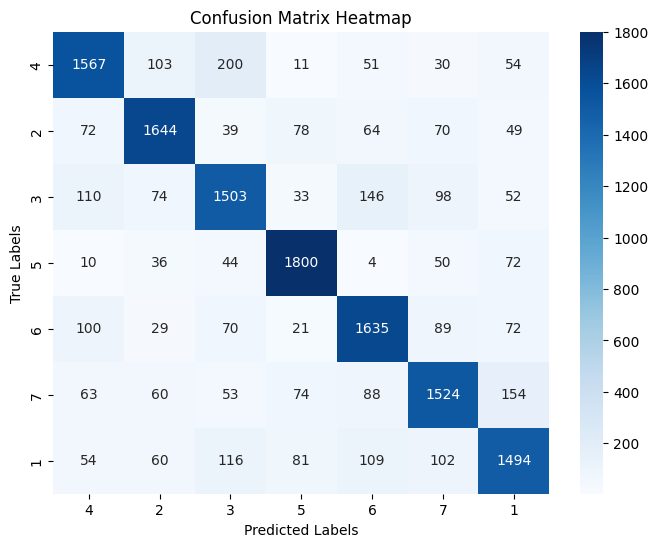

Best Parameters: {'hidden_layer_sizes': (100,)}
Accuracy: 79.1312358276644 %
Classification Report:
               precision    recall  f1-score   support

           1       0.79      0.78      0.79      2016
           2       0.82      0.82      0.82      2016
           3       0.74      0.75      0.74      2016
           4       0.86      0.89      0.88      2016
           5       0.78      0.81      0.80      2016
           6       0.78      0.76      0.77      2016
           7       0.77      0.74      0.75      2016

    accuracy                           0.79     14112
   macro avg       0.79      0.79      0.79     14112
weighted avg       0.79      0.79      0.79     14112



In [31]:
mlp_feat_eng_model = MLPClassifier(random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_feature_eng)
X_test_scaled = scaler.fit_transform(X_test_feature_eng)

mlp_feat_eng_model = train_model(mlp_model,param_grid,X_train_scaled,y_train,X_test_scaled,y_test)

In [ ]:
with open(current_dir + "/../models/muscle_group_classifiers/mlp_feat_eng_muscle_group_classifier.pkl", 'wb') as f:
    print(type(mlp_feat_eng_model))
    pickle.dump(mlp_feat_eng_model, f)

<class 'sklearn.neural_network._multilayer_perceptron.MLPClassifier'>


In [ ]:
with open(current_dir + "/../models/muscle_group_classifiers/mlp_feat_eng_muscle_group_classifier.pkl", 'rb') as f:
    mlp_feat_eng_model = pickle.load(f)

**Support Vector Machines**

In [34]:
param_grid = {
    'C': [0.1, 1, 10],  
    'kernel': ['linear', 'rbf'],  
    'gamma': ['scale', 'auto'],  
}

Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV] END ...................C=0.1, gamma=auto, kernel=linear; total time=  30.0s
[CV] END ...................C=0.1, gamma=auto, kernel=linear; total time=  29.7s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=  31.2s
[CV] END ...................C=0.1, gamma=auto, kernel=linear; total time=  31.5s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=  37.1s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=  42.8s
[CV] END ......................C=0.1, gamma=auto, kernel=rbf; total time=  50.2s
[CV] END ......................C=0.1, gamma=auto, kernel=rbf; total time=  50.3s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=  52.8s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=  53.8s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=  56.6s
[CV] END .......................C=1, gamma=scale

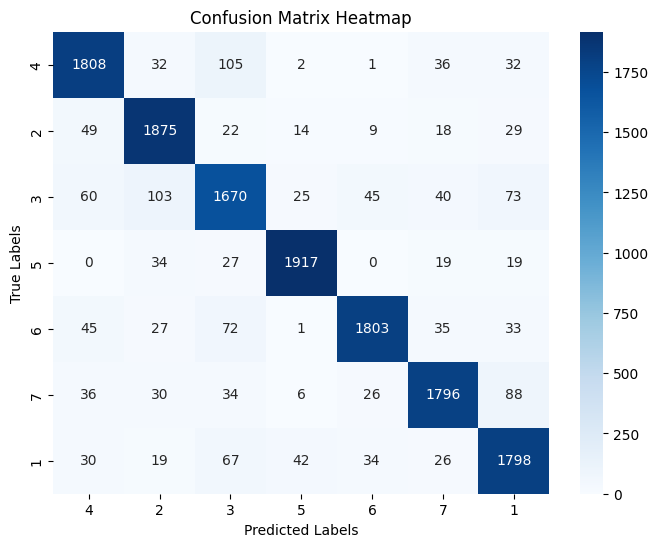

Best Parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Accuracy: 89.76048752834467 %
Classification Report:
               precision    recall  f1-score   support

           1       0.89      0.90      0.89      2016
           2       0.88      0.93      0.91      2016
           3       0.84      0.83      0.83      2016
           4       0.96      0.95      0.95      2016
           5       0.94      0.89      0.92      2016
           6       0.91      0.89      0.90      2016
           7       0.87      0.89      0.88      2016

    accuracy                           0.90     14112
   macro avg       0.90      0.90      0.90     14112
weighted avg       0.90      0.90      0.90     14112



In [35]:
svc_model = SVC(random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

svc_model = train_model(svc_model,param_grid,X_train_scaled,y_train,X_test_scaled,y_test)

In [ ]:
with open(current_dir + "/../models/muscle_group_classifiers/svc_muscle_group_classifier.pkl", 'wb') as f:
    print(type(svc_model))
    pickle.dump(svc_model, f)

<class 'sklearn.svm._classes.SVC'>


In [ ]:
with open(current_dir + "/../models/muscle_group_classifiers/svc_muscle_group_classifier.pkl", 'rb') as f:
    svc_model = pickle.load(f)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=  26.2s
[CV] END ...................C=0.1, gamma=auto, kernel=linear; total time=  26.9s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=  27.2s
[CV] END ...................C=0.1, gamma=auto, kernel=linear; total time=  27.7s
[CV] END ...................C=0.1, gamma=auto, kernel=linear; total time=  28.5s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=  29.5s
[CV] END ......................C=0.1, gamma=auto, kernel=rbf; total time=  35.4s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=  36.8s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=  37.2s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=  39.0s
[CV] END ......................C=0.1, gamma=auto, kernel=rbf; total time=  39.9s
[CV] END ......................C=0.1, gamma=auto

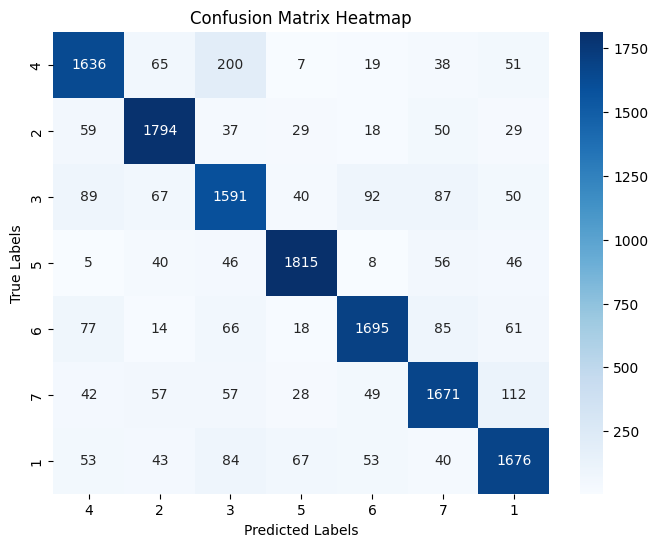

Best Parameters: {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}
Accuracy: 84.16950113378685 %
Classification Report:
               precision    recall  f1-score   support

           1       0.83      0.81      0.82      2016
           2       0.86      0.89      0.88      2016
           3       0.76      0.79      0.78      2016
           4       0.91      0.90      0.90      2016
           5       0.88      0.84      0.86      2016
           6       0.82      0.83      0.83      2016
           7       0.83      0.83      0.83      2016

    accuracy                           0.84     14112
   macro avg       0.84      0.84      0.84     14112
weighted avg       0.84      0.84      0.84     14112



In [38]:
svc_feat_eng_model = SVC(random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_feature_eng)
X_test_scaled = scaler.fit_transform(X_test_feature_eng)

svc_feat_eng_model = train_model(svc_model,param_grid,X_train_scaled,y_train,X_test_scaled,y_test)

In [ ]:
with open(current_dir + "/../models/muscle_group_classifiers/svc_feat_eng_muscle_group_classifier.pkl", 'wb') as f:
    print(type(svc_feat_eng_model))
    pickle.dump(svc_feat_eng_model, f)

<class 'sklearn.svm._classes.SVC'>


In [ ]:
with open(current_dir + "/../models/muscle_group_classifiers/svc_feat_eng_muscle_group_classifier.pkl", 'rb') as f:
    svc_feat_eng_model = pickle.load(f)